In [1]:
import numpy as np
import pandas as pd

train_sum = pd.read_csv('/kaggle/input/feedback-prize-2021/train.csv')

In [2]:
train_sum.columns

Index(['id', 'discourse_id', 'discourse_start', 'discourse_end',
       'discourse_text', 'discourse_type', 'discourse_type_num',
       'predictionstring'],
      dtype='object')

In [3]:
train_sum.id.nunique()

15594

Text(0.5, 1.0, 'Count of Discourse Elements by Type')

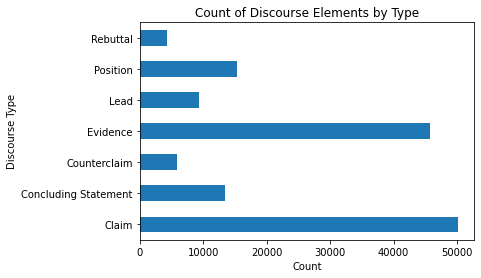

In [4]:
plt1 = train_sum.groupby(['discourse_type']).size().plot.barh()
plt1.set_xlabel('Count')
plt1.set_ylabel('Discourse Type')
plt1.set_title("Count of Discourse Elements by Type")

In [5]:
# Average num of discourse type per essay
train_sum.groupby(['discourse_type']).size()/train_sum.id.nunique()

discourse_type
Claim                   3.219700
Concluding Statement    0.866038
Counterclaim            0.373028
Evidence                2.930743
Lead                    0.596704
Position                0.988778
Rebuttal                0.278120
dtype: float64

Text(0.5, 1.0, 'Percentage of Essays with Discourse Type')

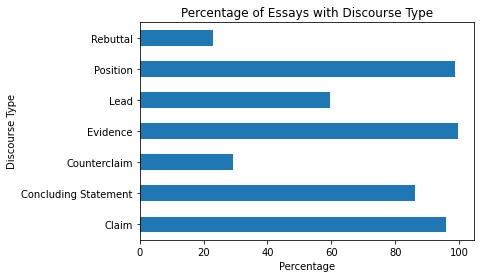

In [6]:
dt_per_essay = train_sum.groupby(['id'])['discourse_type'].value_counts().reset_index(name='count')
dt_per_essay['discourse_exist'] = 1
plt2 = (((dt_per_essay.groupby(['discourse_type']).discourse_exist.sum())/(dt_per_essay.id.nunique()))*100).plot.barh()
plt2.set_xlabel('Percentage')
plt2.set_ylabel('Discourse Type')
plt2.set_title("Percentage of Essays with Discourse Type")

Text(0.5, 1.0, 'Average Length of Discourse Type (# of Words)')

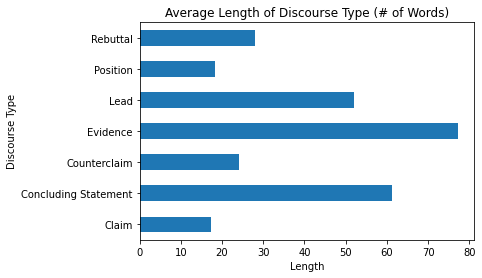

In [7]:
train_sum['pred_split'] = train_sum['predictionstring'].str.split()
train_sum['pred_len'] = train_sum['pred_split'].str.len()
plt3 = train_sum.groupby(['discourse_type'])['pred_len'].mean().plot.barh()
plt3.set_xlabel('Length')
plt3.set_ylabel('Discourse Type')
plt3.set_title("Average Length of Discourse Type (# of Words)")

Text(0.5, 1.0, 'Average Start and End Position by Discourse Type')

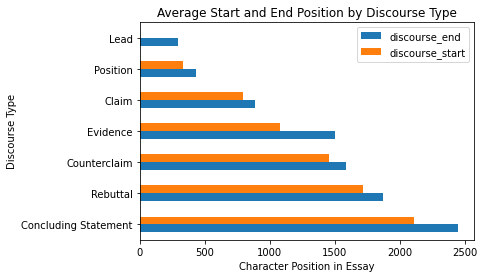

In [8]:
start_end = train_sum.groupby(['discourse_type'])[['discourse_end', 'discourse_start']].mean().reset_index().sort_values(by = 'discourse_start', ascending = False)
plt4 = start_end.plot(x='discourse_type',
        kind='barh',
        stacked=False)
plt4.set_xlabel('Character Position in Essay')
plt4.set_ylabel('Discourse Type')
plt4.set_title("Average Start and End Position by Discourse Type")